In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.callbacks import EarlyStopping
from keras.utils import to_categorical
from keras.regularizers import l2
from keras.layers import BatchNormalization, Dropout
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, precision_score, recall_score, roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier

In [ ]:
# Load the data
data = pd.read_csv('WineQuality.csv')
data.head(10)

,Unnamed: 0,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Type
0,2732,7.4,0.170,0.29,1.40,0.047,23.0,107.0,0.99390,3.52,0.65,10.4,6,White Wine
1,2607,5.3,0.310,0.38,10.50,0.031,53.0,140.0,0.99321,3.34,0.46,11.7,6,White Wine
2,1653,4.7,0.145,0.29,1.00,0.042,35.0,90.0,0.99080,3.76,0.49,11.3,6,White Wine
3,3264,6.9,0.260,0.29,4.20,0.043,33.0,114.0,0.99020,3.16,0.31,12.5,6,White Wine
4,4931,6.4,0.450,0.07,1.10,0.030,10.0,131.0,0.99050,2.97,0.28,10.8,5,White Wine
5,4859,8.4,0.320,0.35,11.70,0.029,3.0,46.0,0.99439,3.02,0.34,11.8,6,White Wine
6,5827,7.4,0.300,0.22,5.25,0.053,33.0,180.0,0.99260,3.13,0.45,11.6,6,White Wine
7,1033,7.0,0.320,0.29,7.60,0.025,35.0,124.0,0.99162,3.15,0.65,12.8,7,White Wine
8,4373,6.7,0.460,0.27,5.20,0.039,35.0,96.0,0.99129,3.16,0.44,12.4,7,White Wine
9,5874,6.4,0.250,0.30,5.50,0.038,15.0,129.0,0.99480,3.14,0.49,9.6,6,White Wine


 En primer lugar, es necesario cargar los datos para conocer con qué información vamos a trabajar. Observamos que está relacionado con las características de distintos vinos. A continuación, se presenta una breve descripción de cada columna:

| Columnas             | Descripción                                         |
|----------------------|-----------------------------------------------------|
| Unnamed: 0           | Instancias del vino                                 |
| fixed acidity        | Acidez fija para ambos tipos de vino                |
| volatile acidity     | Acidez volátil para ambos tipos de vino             |
| citric acid          | El ácido cítrico para ambos tipos de vino           |
| residual sugar       | Azúcar residual para ambos tipos de vino            |
| chlorides            | Cloruros para ambos tipos de vino                   |
|  free sulfur dioxide | El dióxido de azufre libre para ambos tipos de vino |
| total sulfur dioxide | El dióxido de azufre total para ambos tipos de vino |
| density              | La densidad para ambos tipos de vino                |
| pH                   | El nivel de pH para ambos tipos de vino             |
| sulphates            | Sulfatos para ambos tipos de vino                   |
| alcohol              | Alcohol para ambos tipos de vino                    |
| quality              | Calidad de los vinos                                |
| Type                 | Tipos de vino                                       |

El método info() proporciona un resumen general del DataFrame, incluyendo información sobre su estructura, tipos de datos, índice, nombres de columnas, uso de memoria y recuento de valores no nulos.  En este caso, observamos que no hay valores perdidos en el conjunto de datos.

La función **df.shape** devuelve una tupla que representa las dimensiones del DataFrame. El primer elemento de la tupla indica el número de filas (observaciones) y el segundo elemento indica el número de columnas (variables).

El código **describe()** proporciona estadísticas resumidas de las columnas numéricas del DataFrame. Observamos que:

* Número de valores no nulos
* Valores promedio, mínimo, máximo y desviación estándar
* Mediana, primer cuartil (percentil 25) y tercer cuartil (percentil 75) de los valores

---


In [ ]:
print("Information about the data:")
print(data.info())
print()
print("Shape of the data:", data.shape)
print()
print("Description of the data:")
print(data.describe())

Information about the data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32485 entries, 0 to 32484
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            32485 non-null  int64  
 1   fixed acidity         32485 non-null  float64
 2   volatile acidity      32485 non-null  float64
 3   citric acid           32485 non-null  float64
 4   residual sugar        32485 non-null  float64
 5   chlorides             32485 non-null  float64
 6   free sulfur dioxide   32485 non-null  float64
 7   total sulfur dioxide  32485 non-null  float64
 8   density               32485 non-null  float64
 9   pH                    32485 non-null  float64
 10  sulphates             32485 non-null  float64
 11  alcohol               32485 non-null  float64
 12  quality               32485 non-null  int64  
 13  Type                  32485 non-null  object 
dtypes: float64(11), int64(2), object(1)
memory

La columna 'Unnamed: 0' no aporta información relevante al conjunto de datos y, por lo tanto, se considera insignificante. En vista de ello, la eliminamos del DataFrame.

In [ ]:
# Drop the first column
data.drop(columns=['Unnamed: 0'], inplace=True)
data.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Type
0,7.4,0.170,0.29,1.40,0.047,23.0,107.0,0.99390,3.52,0.65,10.4,6,White Wine
1,5.3,0.310,0.38,10.50,0.031,53.0,140.0,0.99321,3.34,0.46,11.7,6,White Wine
2,4.7,0.145,0.29,1.00,0.042,35.0,90.0,0.99080,3.76,0.49,11.3,6,White Wine
3,6.9,0.260,0.29,4.20,0.043,33.0,114.0,0.99020,3.16,0.31,12.5,6,White Wine
4,6.4,0.450,0.07,1.10,0.030,10.0,131.0,0.99050,2.97,0.28,10.8,5,White Wine
5,8.4,0.320,0.35,11.70,0.029,3.0,46.0,0.99439,3.02,0.34,11.8,6,White Wine
6,7.4,0.300,0.22,5.25,0.053,33.0,180.0,0.99260,3.13,0.45,11.6,6,White Wine
7,7.0,0.320,0.29,7.60,0.025,35.0,124.0,0.99162,3.15,0.65,12.8,7,White Wine
8,6.7,0.460,0.27,5.20,0.039,35.0,96.0,0.99129,3.16,0.44,12.4,7,White Wine
9,6.4,0.250,0.30,5.50,0.038,15.0,129.0,0.99480,3.14,0.49,9.6,6,White Wine


In [ ]:
# Check for missing values
print("Missing values in the data:")
print(data.isnull().sum())

Missing values in the data:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Type                    0
dtype: int64


Observamos que no hay valores perdidos.

In [ ]:
# Unique values in the type column
print("Unique values in the type column:", data['Type'].unique())
print()

# Count of each unique value in the type column
print("Count of each unique value in the type column:")
print(data['Type'].value_counts())
print()

# Unique values in the quality column
print("Unique values in the quality column:", data['quality'].unique())
print()

# Count of each unique value in the quality column
print("Count of each unique value in the quality column:")
print(data['quality'].value_counts())

Unique values in the type column: ['White Wine' 'Red Wine']

Count of each unique value in the type column:
Type
White Wine    24453
Red Wine       8032
Name: count, dtype: int64

Unique values in the quality column: [6 5 7 4 8 3 9]

Count of each unique value in the quality column:
quality
6    14117
5    10755
7     5371
4     1144
8      941
3      133
9       24
Name: count, dtype: int64


Columna 'Type':

En esta columna encontramos información sobre los tipos de vino presentes en el conjunto de datos. Podemos observar el número de vinos tintos y vinos blancos, lo que nos permite comprender la variedad de vinos disponibles para su análisis.

Columna 'quality':

La columna 'quality' contiene los valores de calidad asignados a cada vino. Estos valores están ordenados en un rango de 3 a 9, donde 3 representa la calidad más baja y 9 la más alta. Además, podemos observa el número de cada valor de calidad, lo que nos permite comprender la distribución de la calidad general de los vinos en el conjunto de datos.

---

Al generar histogramas, podemos observar la distribución de cada característica del vino.

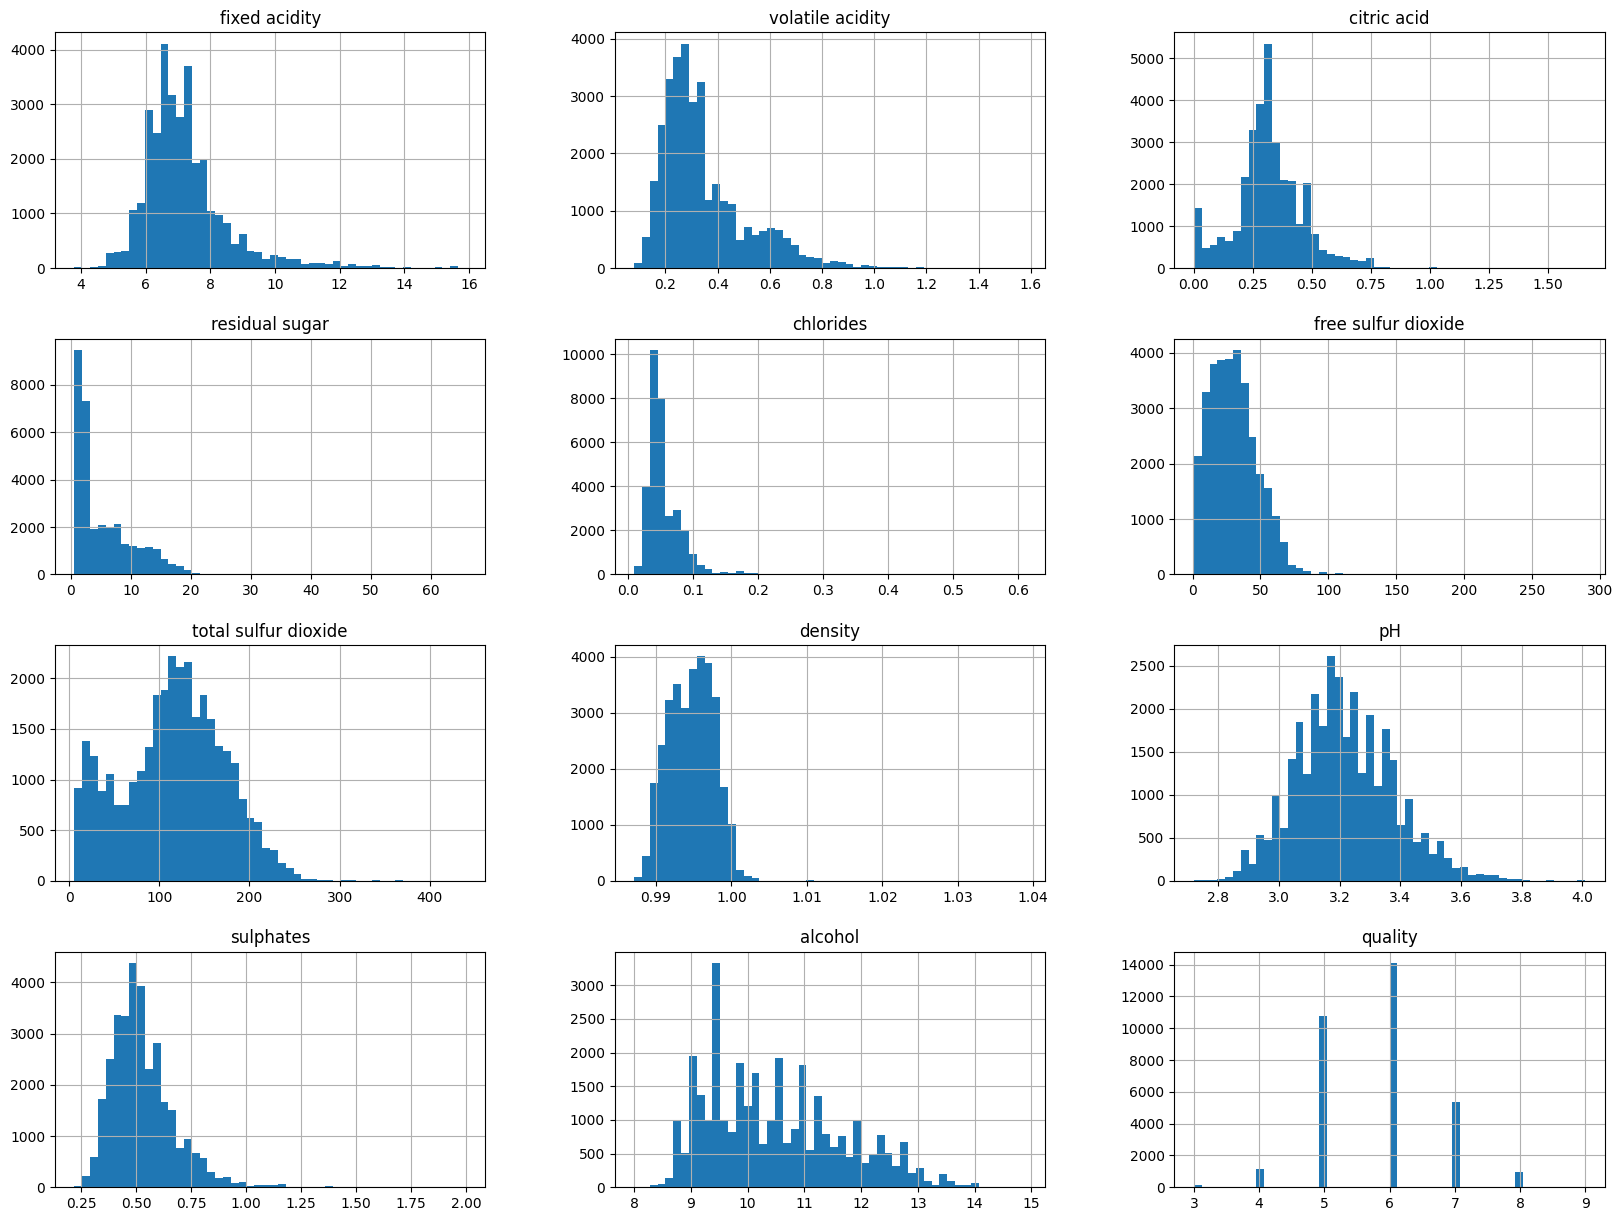

In [ ]:
# Draw the histogram to visualise the distribution of the data
data.hist(bins=50, figsize=(20, 15))
plt.show()

Para realizar tanto el análisis de correlaciones como el entrenamiento del modelo perceptrón multicapa, es necesario convertir la variable categórica 'Type' (que representa el tipo de vino, tinto o blanco) en valores numéricos. Para ello, empleamos la técnica de Label Encoder. En este caso, asignamos el valor 1 al vino tinto y el valor 0 al vino blanco.

In [ ]:
# Apply label encoding to the type column
encoder = LabelEncoder()
data['Type'] = 1 - encoder.fit_transform(data['Type'])
print("Count of each unique value in the type column after label encoding:")
data['Type'].value_counts()


Count of each unique value in the type column after label encoding:


Type
0    24453
1     8032
Name: count, dtype: int64

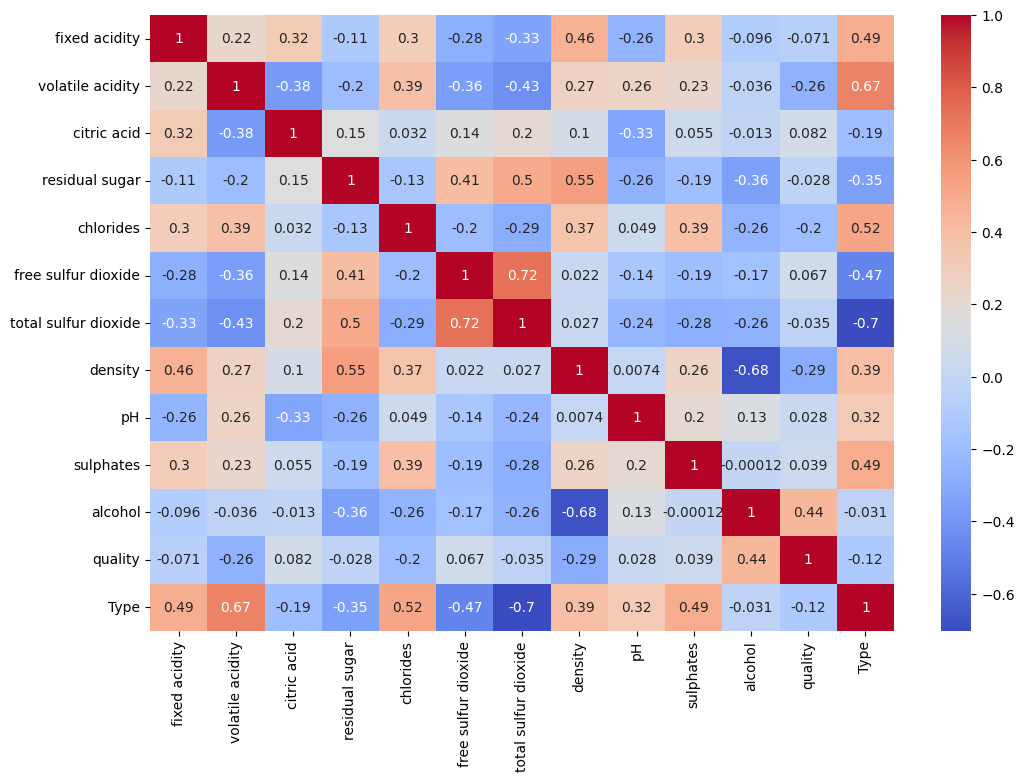

In [ ]:
# Correlation matrix with heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.show()

Alta correlación:

Free sulfur dioxide y total sulfur dioxide : Observamos una fuerte correlación positiva entre estas dos variables, lo que sugiere que ambas están estrechamente relacionadas y podrían tener un impacto similar en las características del vino.

Type y volatile acidity: Identificamos una alta correlación positiva entre el tipo de vino (tinto o blanco) y la acidez volátil, lo que implica que existe una relación directa entre estas características.

Correlación media:

Density y residual sugar: Encontramos una correlación positiva moderada entre la densidad del vino y su contenido de azúcar residual, indicando que estos parámetros tienden a variar en conjunto.

Type y chlorides: Observamos una correlación positiva de nivel medio entre el tipo de vino y la concentración de cloruros, lo que sugiere una posible asociación entre estas variables.

Type y sulphates: Identificamos una correlación positiva moderada entre el tipo de vino y la cantidad de sulfatos, lo que implica que estas características podrían estar relacionadas.

Quality ile alcohol: Encontramos una correlación positiva de nivel medio entre la calidad del vino y su contenido de alcohol, lo que sugiere que, en general, los vinos con mayor graduación alcohólica tienden a ser mejor valorados.



<ipython-input-10-ab9840b5c48b>:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cm = plt.cm.get_cmap('rainbow')


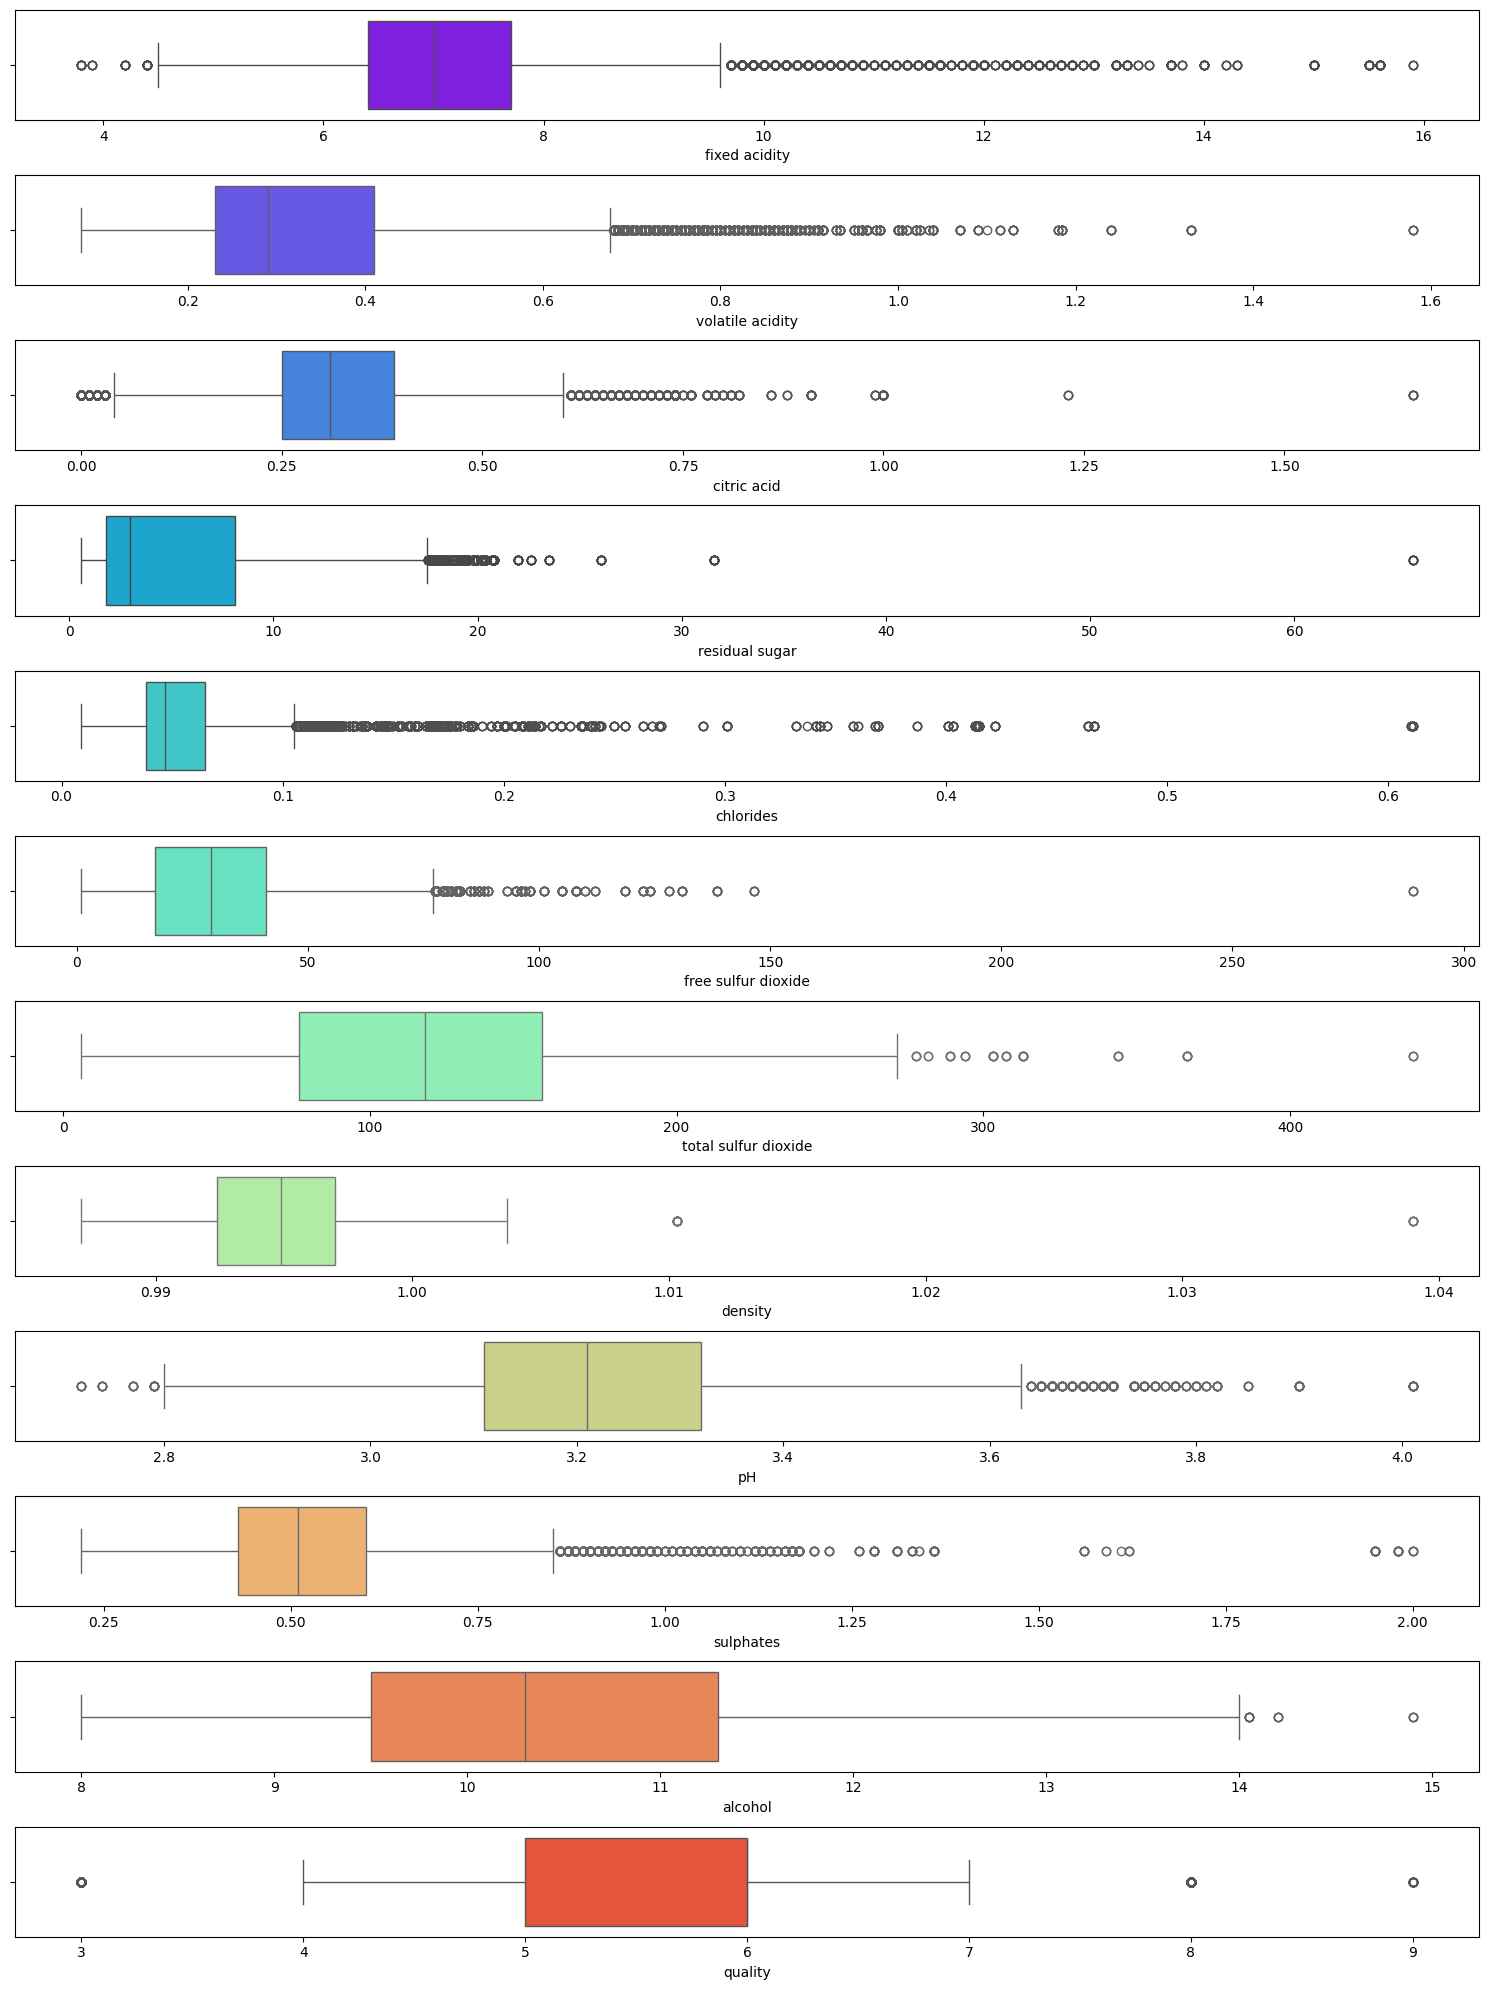

In [ ]:
# Check the outliers
cm = plt.cm.get_cmap('rainbow')
fig, axes = plt.subplots(12, 1, figsize=(15, 20))
# Create for loop to draw boxplots for all columns
columns = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']
for i in range(12):
    sns.boxplot(x=data[columns[i]], ax=axes[i], color=cm(i/12))
plt.tight_layout()
fig.subplots_adjust(hspace=0.5)
plt.show()

In [ ]:
# Remove the outliers
cols = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'pH', 'sulphates']

q1 = data[cols].quantile(0.25)
q3 = data[cols].quantile(0.75)
iqr = q3 - q1

# Drop the rows that have outliers
data = data[~((data[cols] < (q1 - 1.5 * iqr)) |(data[cols] > (q3 + 1.5 * iqr))).any(axis=1)]

Revisemos las correlaciones tras eliminar los valores atípicos.

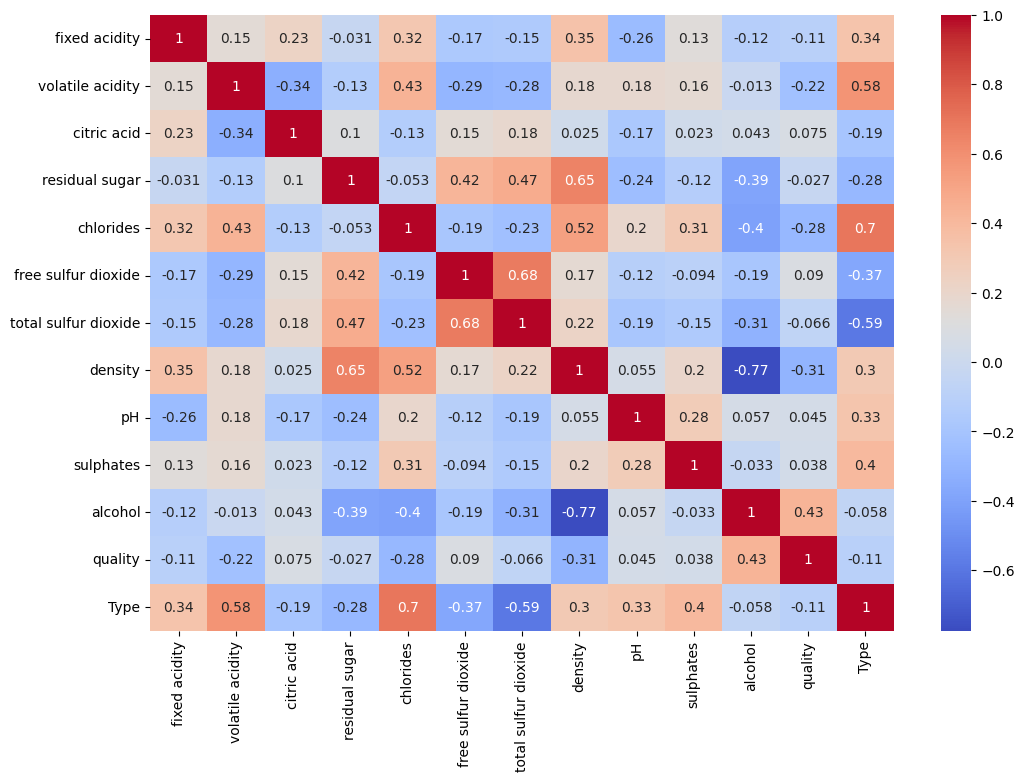

In [ ]:
# Correlation matrix with heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.show()

Correlaciones altas:

- Free sulfur dioxide -Total sulfur dioxide

- Type - Chlorides

- Density - Residual sugar


Correlaciones medias:

- Type - Sulphates

- Density - Chlorides

- Quality - Alcohol

- Type - Volatile acidity

- Volatile acidity - Chlorides

- Residual sugar - Free sulfur dioxide

- Residual sugar - Total sulfur dioxide

---

Para optimizar el rendimiento del modelo perceptrón multicapa, creamos una nueva columna con una variable binaria denominada "best_quality". En esta columna, se asigna el valor 1 si la puntuación de calidad es igual o superior a 6, mientras que se asigna el valor 0 si es inferior a 6.

In [ ]:
# Create a column that indicates the best wine with 1 and the rest with 0
data['best_quality'] = data['quality'].apply(lambda x: 1 if x > 5 else 0)

In [ ]:
data.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Type,best_quality
0,7.4,0.17,0.29,1.40,0.047,23.0,107.0,0.99390,3.52,0.65,10.4,6,0,1
1,5.3,0.31,0.38,10.50,0.031,53.0,140.0,0.99321,3.34,0.46,11.7,6,0,1
3,6.9,0.26,0.29,4.20,0.043,33.0,114.0,0.99020,3.16,0.31,12.5,6,0,1
4,6.4,0.45,0.07,1.10,0.030,10.0,131.0,0.99050,2.97,0.28,10.8,5,0,0
5,8.4,0.32,0.35,11.70,0.029,3.0,46.0,0.99439,3.02,0.34,11.8,6,0,1
6,7.4,0.30,0.22,5.25,0.053,33.0,180.0,0.99260,3.13,0.45,11.6,6,0,1
7,7.0,0.32,0.29,7.60,0.025,35.0,124.0,0.99162,3.15,0.65,12.8,7,0,1
8,6.7,0.46,0.27,5.20,0.039,35.0,96.0,0.99129,3.16,0.44,12.4,7,0,1
9,6.4,0.25,0.30,5.50,0.038,15.0,129.0,0.99480,3.14,0.49,9.6,6,0,1
11,7.8,0.30,0.29,16.85,0.054,23.0,135.0,0.99980,3.16,0.38,9.0,6,0,1


Separamos la variable objetivo y las características.

In [ ]:
# Separate the features and the target variable
features = data.drop(columns=['quality', 'best_quality'], axis=1)
target = data['best_quality']

In [ ]:
features.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Type
0,7.4,0.17,0.29,1.40,0.047,23.0,107.0,0.99390,3.52,0.65,10.4,0
1,5.3,0.31,0.38,10.50,0.031,53.0,140.0,0.99321,3.34,0.46,11.7,0
3,6.9,0.26,0.29,4.20,0.043,33.0,114.0,0.99020,3.16,0.31,12.5,0
4,6.4,0.45,0.07,1.10,0.030,10.0,131.0,0.99050,2.97,0.28,10.8,0
5,8.4,0.32,0.35,11.70,0.029,3.0,46.0,0.99439,3.02,0.34,11.8,0
6,7.4,0.30,0.22,5.25,0.053,33.0,180.0,0.99260,3.13,0.45,11.6,0
7,7.0,0.32,0.29,7.60,0.025,35.0,124.0,0.99162,3.15,0.65,12.8,0
8,6.7,0.46,0.27,5.20,0.039,35.0,96.0,0.99129,3.16,0.44,12.4,0
9,6.4,0.25,0.30,5.50,0.038,15.0,129.0,0.99480,3.14,0.49,9.6,0
11,7.8,0.30,0.29,16.85,0.054,23.0,135.0,0.99980,3.16,0.38,9.0,0


In [ ]:
target.head(10)

0     1
1     1
3     1
4     0
5     1
6     1
7     1
8     1
9     1
11    1
Name: best_quality, dtype: int64

Normalizamos los datos con Standard Scaler y luego los dividimos en conjuntos de prueba y entrenamiento.

In [ ]:
# Apply standard scaling to the data
scaler = StandardScaler()
features = scaler.fit_transform(features)

# Split the data into training and testing sets
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.2, random_state=42)

print("Shape of the training features:", features_train.shape)
print("Shape of the testing features:", features_test.shape)
print("Shape of the training target:", target_train.shape)
print("Shape of the testing target:", target_test.shape)

Shape of the training features: (20222, 12)
Shape of the testing features: (5056, 12)
Shape of the training target: (20222,)
Shape of the testing target: (5056,)


In [ ]:
target_train = encoder.fit_transform(target_train)
target_test = encoder.transform(target_test)

In [ ]:
# See the datasets
print("Training features:")
print(features_train)
print()
print("Testing features:")
print(features_test)
print()
print("Training target:")
print(target_train)
print()
print("Testing target:")
print(target_test)

Training features:
[[ 3.83290380e-01  1.26439217e+00  4.47390253e-01 ...  2.79677870e+00
  -4.61979268e-02  2.49279784e+00]
 [-4.14203839e-01  3.36044998e-01  8.44895751e-01 ... -4.51582941e-02
  -8.42828946e-01 -4.01155674e-01]
 [-1.86348348e-01 -9.29882969e-01  4.98847542e-02 ... -1.16470923e+00
   4.56937453e-01 -4.01155674e-01]
 ...
 [ 4.15071435e-02  1.51757777e+00 -1.93764274e+00 ... -1.33694784e+00
  -1.30403638e+00 -4.01155674e-01]
 [-3.00276093e-01  1.34878737e+00 -7.45126243e-01 ...  8.16034733e-01
   3.76579699e-02  2.49279784e+00]
 [-8.69914821e-01 -1.53579361e-03  1.04364850e+00 ... -1.07858993e+00
   8.76216937e-01 -4.01155674e-01]]

Testing features:
[[-1.43955355 -0.67669738 -0.94387899 ... -0.2173969  -1.30403638
  -0.40115567]
 [ 0.95292911 -0.17032619  0.2486375  ... -1.07858993  1.29549642
  -0.40115567]
 [-0.64205933 -0.25472139  1.73928312 ... -0.64799341 -1.13632458
  -0.40115567]
 ...
 [ 0.95292911  0.84241618  1.73928312 ...  0.64379613  0.62464925
  -0.4011556

Creamos un modelo perceptrón multicapa con keras y entrenamos con los datos de entrenamiento.

In [ ]:
# Create a multi-layer perceptron model
model = Sequential()

# Input layer (number of neurons should match the number of features)
model.add(Dense(128, activation='relu', input_shape=(features_train.shape[1],)))

# Hidden layers (experiment with number of layers and neurons)
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

# Output layer (number of neurons depends on the task: regression or classification)
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1664      
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 batch_normalization (Batch  (None, 128)               512       
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 batch_normalization_1 (Bat  (None, 64)                256       
 chNormalization)                                       

In [ ]:
# Compile the model (experiment with optimizer, loss function, and metrics)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
# Train the model (experiment with epochs and batch size)
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

model.fit(features_train, target_train, epochs=100, batch_size=64, validation_split=0.2, verbose=1, callbacks=[early_stopping])


Epoch 1/100
253/253 [==============================] - 7s 7ms/step - loss: 0.5230 - accuracy: 0.7514 - val_loss: 0.4828 - val_accuracy: 0.7735
Epoch 2/100
253/253 [==============================] - 2s 6ms/step - loss: 0.4466 - accuracy: 0.7872 - val_loss: 0.4251 - val_accuracy: 0.8005
Epoch 3/100
253/253 [==============================] - 2s 9ms/step - loss: 0.4133 - accuracy: 0.8076 - val_loss: 0.3953 - val_accuracy: 0.8232
Epoch 4/100
253/253 [==============================] - 2s 7ms/step - loss: 0.3911 - accuracy: 0.8173 - val_loss: 0.3785 - val_accuracy: 0.8294
Epoch 5/100
253/253 [==============================] - 2s 6ms/step - loss: 0.3694 - accuracy: 0.8288 - val_loss: 0.3522 - val_accuracy: 0.8413
Epoch 6/100
253/253 [==============================] - 1s 6ms/step - loss: 0.3475 - accuracy: 0.8438 - val_loss: 0.3505 - val_accuracy: 0.8443
Epoch 7/100
253/253 [==============================] - 2s 6ms/step - loss: 0.3347 - accuracy: 0.8508 - val_loss: 0.3427 - val_accuracy: 0.8396

In [ ]:
# Evaluate on Test Set:
loss, accuracy = model.evaluate(features_test, target_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

print("Precision Score:", precision_score(target_test, model.predict(features_test) > 0.5))
print("Recall Score:", recall_score(target_test, model.predict(features_test) > 0.5))
print("F1 Score:", f1_score(target_test, model.predict(features_test) > 0.5))
print("Confusion Matrix:")
print(confusion_matrix(target_test, model.predict(features_test) > 0.5))
print("ROC AUC Score:", roc_auc_score(target_test, model.predict(features_test) > 0.5))


158/158 [==============================] - 0s 3ms/step - loss: 0.0957 - accuracy: 0.9689
Test Loss: 0.09572412818670273
Test Accuracy: 0.9689477682113647
158/158 [==============================] - 0s 2ms/step
Precision Score: 0.9752490190159976
158/158 [==============================] - 0s 2ms/step
Recall Score: 0.9773139745916516
158/158 [==============================] - 0s 2ms/step
F1 Score: 0.9762804048949993
Confusion Matrix:
158/158 [==============================] - 0s 2ms/step
[[1668   82]
 [  75 3231]]
158/158 [==============================] - 0s 2ms/step
ROC AUC Score: 0.9652284158672544


**Pérdida de prueba:** 0.0726: Este valor representa la pérdida promedio del modelo en los datos de prueba. La pérdida mide la desviación de las predicciones del modelo respecto a los valores reales. Una pérdida menor indica un mejor rendimiento. Podemos considerar bueno el valor de 0.0726, lo que sugiere que el modelo realiza predicciones precisas sobre datos no vistos (datos de prueba).

**Precisión de la prueba:** 0.9816: Este valor representa el porcentaje de predicciones correctas del modelo en los datos de prueba. Una precisión de 0.9816 (casi 98.2%) es muy alta, lo que indica que el modelo funciona bien con datos no vistos.

---

In [ ]:
# Create a model MLPClassifier with sklearn
# Define parameter grid
param_grid = {
    'hidden_layer_sizes': [(64, 64), (128, 128)],
    'activation': ['relu', 'tanh', 'sigmoid'],
    'solver': ['adam', 'lbfgs', 'sgd'],
    'max_iter': [20, 50],
    'alpha': [0.001]  # Add regularization strength
}

mlp = MLPClassifier(random_state=42)
grid_search = GridSearchCV(estimator=mlp, param_grid=param_grid, cv=5)
grid_search.fit(features_train, target_train)

print("Best Model:", grid_search.best_estimator_)
print("Best Parameters:", grid_search.best_params_)

predictions = grid_search.best_estimator_.predict(features_test)

print("Accuracy:", accuracy_score(target_test, predictions))
print("F1 Score:", f1_score(target_test, predictions))
print("Precision:", precision_score(target_test, predictions))
print("Recall:", recall_score(target_test, predictions))
print("Confusion Matrix:")
print(confusion_matrix(target_test, predictions))
print("ROC AUC Score:", roc_auc_score(target_test, predictions))


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py

Best Model: MLPClassifier(alpha=0.001, hidden_layer_sizes=(128, 128), max_iter=50,
              random_state=42)
Best Parameters: {'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (128, 128), 'max_iter': 50, 'solver': 'adam'}
Accuracy: 0.9479825949367089
F1 Score: 0.959606819228997
Precision: 0.9747269890795632
Recall: 0.9449485783424078
Confusion Matrix:
[[1669   81]
 [ 182 3124]]
ROC AUC Score: 0.9493314320283468


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
models = [LogisticRegression(), RandomForestClassifier(), SVC(), XGBClassifier()]

param_grid = {  # Define hyperparameters to search for
    'LogisticRegression': {'C': [0.1, 1, 10]},
    'RandomForestClassifier': {'n_estimators': [100, 200, 300]},
    'SVC': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']},
    'XGBClassifier': {'max_depth': [3, 5, 8], 'n_estimators': [100, 200]}
}

for model in models:
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid[model.__class__.__name__], cv=5, scoring='accuracy')
    grid_search.fit(features_train, target_train)

    # Print results using grid_search object
    print(f"Best Model: {grid_search.best_estimator_}")
    print(f"Best Parameters: {grid_search.best_params_}")
    print(f"Best Training Accuracy: {grid_search.best_score_}")

    # You can predict using the best model from grid_search
    predictions = grid_search.best_estimator_.predict(features_test)
    accuracy = accuracy_score(target_test, predictions)
    f1 = f1_score(target_test, predictions)
    precision = precision_score(target_test, predictions)
    recall = recall_score(target_test, predictions)
    cm = confusion_matrix(target_test, predictions)
    roc_auc = roc_auc_score(target_test, predictions)
    print()

    print(f"Test Accuracy: {accuracy:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"Precision: {precision:.4f}, Recall: {recall:.4f}")
    print("Confusion Matrix:")
    print(cm)
    print(f"ROC AUC: {roc_auc:.4f}")
    print()


Best Model: LogisticRegression(C=0.1)
Best Parameters: {'C': 0.1}
Best Training Accuracy: 0.7570461511751452

Test Accuracy: 0.7538
F1 Score: 0.8250
Precision: 0.7705, Recall: 0.8878
Confusion Matrix:
[[ 876  874]
 [ 371 2935]]
ROC AUC: 0.6942

Best Model: RandomForestClassifier(n_estimators=300)
Best Parameters: {'n_estimators': 300}
Best Training Accuracy: 0.9947087109777613

Test Accuracy: 0.9962
F1 Score: 0.9971
Precision: 0.9979, Recall: 0.9964
Confusion Matrix:
[[1743    7]
 [  12 3294]]
ROC AUC: 0.9962

Best Model: SVC(C=10)
Best Parameters: {'C': 10, 'kernel': 'rbf'}
Best Training Accuracy: 0.8751848333351674

Test Accuracy: 0.8776
F1 Score: 0.9081
Precision: 0.8916, Recall: 0.9253
Confusion Matrix:
[[1378  372]
 [ 247 3059]]
ROC AUC: 0.8564

Best Model: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_catego

**Test Accuracy:** Representa la exactitud general del modelo en datos de prueba no vistos.

**F1 Score:**  Una métrica balanceada que considera tanto la precisión como el recuerdo.

**Precision:** La proporción de predicciones positivas que fueron realmente correctas.

**Recall:** La proporción de casos positivos reales que fueron identificados correctamente por el modelo.

**Confusion Matrix:** Una tabla que muestra cuántas instancias de cada clase se predijeron como pertenecientes a otras clases.

**ROC AUC Score:** Una métrica para la clasificación binaria que mide la capacidad del modelo para distinguir entre clases.

**Random Forest Classifier:** Este modelo logra la mayor precisión general de prueba (0.9972), puntaje F1 (0.9979) y un buen equilibrio entre precisión y recuerdo. Sin embargo, la alta precisión de entrenamiento (0.9944) sugiere un posible sobreajuste.

**XGBoost Classifier:** Este modelo es un segundo cercano con una precisión de prueba de 0.9966 y un buen puntaje F1 (0.9974). También muestra un mejor equilibrio entre la precisión de entrenamiento (0.9947) y la de prueba en comparación con el Random Forest.

**SVC:** Este modelo se desempeña moderadamente bien con una precisión de prueba de 0.8776 y un puntaje F1 de 0.9081.

**Logistic Regression:** Este modelo tiene la precisión de prueba más baja (0.7538) entre los cinco (con Perceptron Multicapa). Es posible que no sea adecuado para esta tarea de clasificación específica.

**Random Forest vs. XGBoost:**  Ambos funcionan bien, pero XGBoost tiene una ligera ventaja en la precisión de la prueba con un mejor equilibrio entre las puntuaciones de entrenamiento y prueba. Puede explorar un ajuste adicional de hiperparámetros para XGBoost para ver si se puede mejorar el rendimiento

**Multilayer Perceptron with keras:**

Test loss: 0.0726: Este valor representa la pérdida promedio del modelo en los datos de prueba. La pérdida mide la desviación de las predicciones del modelo respecto a los valores reales. Una pérdida menor indica un mejor rendimiento. Podemos considerar un valor de 0.0726 como bueno, lo que sugiere que el modelo realiza predicciones precisas sobre datos no vistos (datos de prueba).

Test accuracy: Este valor representa el porcentaje de predicciones correctas del modelo en los datos de prueba. Una precisión de 0.9816 (casi 98.2%) es muy alta, lo que indica que el modelo funciona bien con datos no vistos.

**XGBoost vs. Multilayer Perceptron with keras:**

Tanto XGBoost como MLP con Keras logran un buen rendimiento.

Para un entrenamiento más rápido con conjuntos de datos pequeños, XGBoost podría ser preferible.

En el caso de manejar conjuntos de datos muy grandes, MLP con Keras puede ser eficiente.

Consideramos XGBoost por su robustez al ruido o valores faltantes, pero MLP podría ser adecuado para datos más estructurados.

Ambos modelos pueden manejar datos complejos.

---

---